In [1]:
import os
import geopandas
import sys
sys.path.append('/Users/samrelins/Documents/LIDA/dental_project/src/')
from ga_data_prep import *
import matplotlib.pyplot as plt

In [2]:
# load ga data and clean / pre-process
bib_dir = "/Users/samrelins/Documents/LIDA/dental_project/data/bib_data/"
ga_path = os.path.join(bib_dir, "dental/dental_ga/data.csv")
ga_data = pd.read_csv(ga_path)
ga_data = (ga_data.pipe(clean_ga_data)
           .pipe(add_counts_of_treatments)
           .pipe(convert_ga_numerical_categories)
           .pipe(rename_ga_columns))
ga_data.info()

# load mouth shapefile to geo dataframe
teeth_gdf = geopandas.read_file("mouth_map.shp")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1087
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   entity_id              1082 non-null   object  
 1   has_dental_ga          1082 non-null   float64 
 2   age_at_ga              1082 non-null   float64 
 3   ga_type                1082 non-null   category
 4   total_gas              1082 non-null   float64 
 5   ga_sequence            1082 non-null   float64 
 6   weight_at_ga           914 non-null    float64 
 7   ur6                    1082 non-null   category
 8   ure                    1082 non-null   category
 9   urd                    1082 non-null   category
 10  urc                    1082 non-null   category
 11  urb                    1082 non-null   category
 12  ura                    1082 non-null   category
 13  ula                    1082 non-null   category
 14  ulb                    1082 non-null   c

In [3]:
# build gdf from extractions only data
extractions_only = ga_data.n_treated == 0
exodontia_teeth_data = generate_tooth_level_data(ga_data[extractions_only])
exodontia_teeth_data = (teeth_gdf
                       .merge(exodontia_teeth_data, on="tooth", how="left") 
                       .fillna(0))
exodontia_teeth_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   tooth              52 non-null     object  
 1   primary            52 non-null     int64   
 2   geometry           52 non-null     geometry
 3   n_extracted        52 non-null     float64 
 4   n_filled           52 non-null     float64 
 5   n_sealed           52 non-null     float64 
 6   n_crowned          52 non-null     float64 
 7   n_treated          52 non-null     float64 
 8   n_non_extractions  52 non-null     float64 
dtypes: float64(6), geometry(1), int64(1), object(1)
memory usage: 4.1+ KB


In [4]:
def plot_mouth_map(gdf, feature, cmap, title):
    ax = gdf.plot(feature,
                        legend=True,
                        figsize=(30, 20),
                        cmap=cmap)
    gdf.boundary.plot(ax=ax, color="black")
    ax.axis("off")
    plt.title(title, fontsize=25);
    plt.annotate("Adult Teeth",
                 (0.18, 0.105),
                 fontsize=15,
                 fontweight="bold")
    plt.annotate("Primary Teeth",
                 (0.65, 0.26),
                 fontsize=15,
                 fontweight="bold")

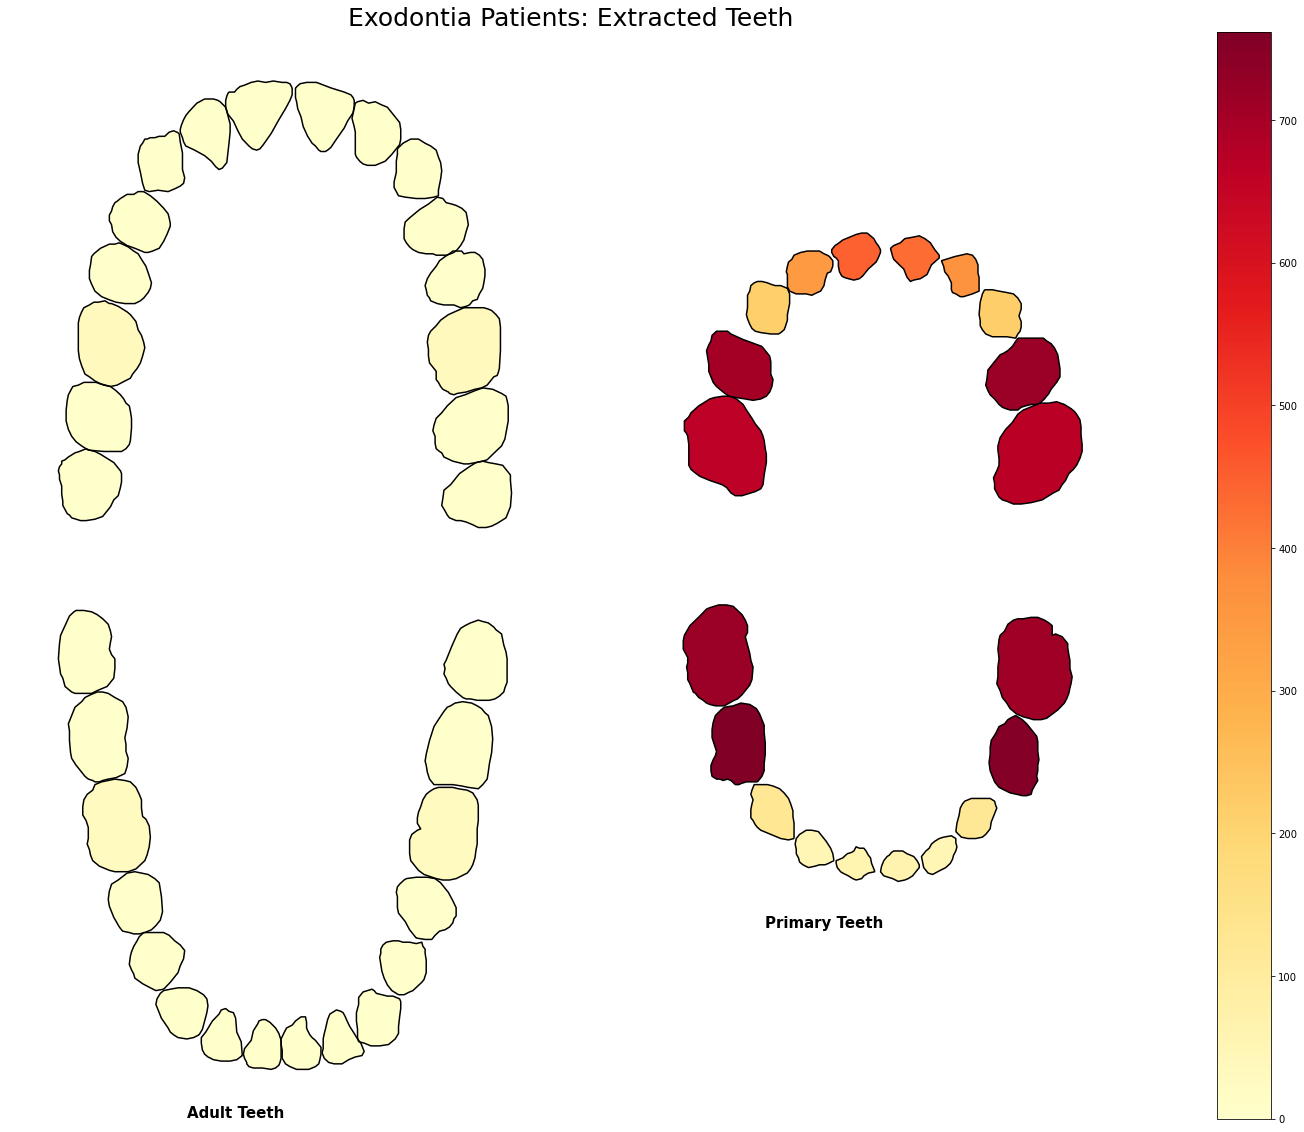

In [5]:
plot_mouth_map(exodontia_teeth_data, 
               "n_extracted",
               cmap="YlOrRd",
               title="Exodontia Patients: Extracted Teeth")

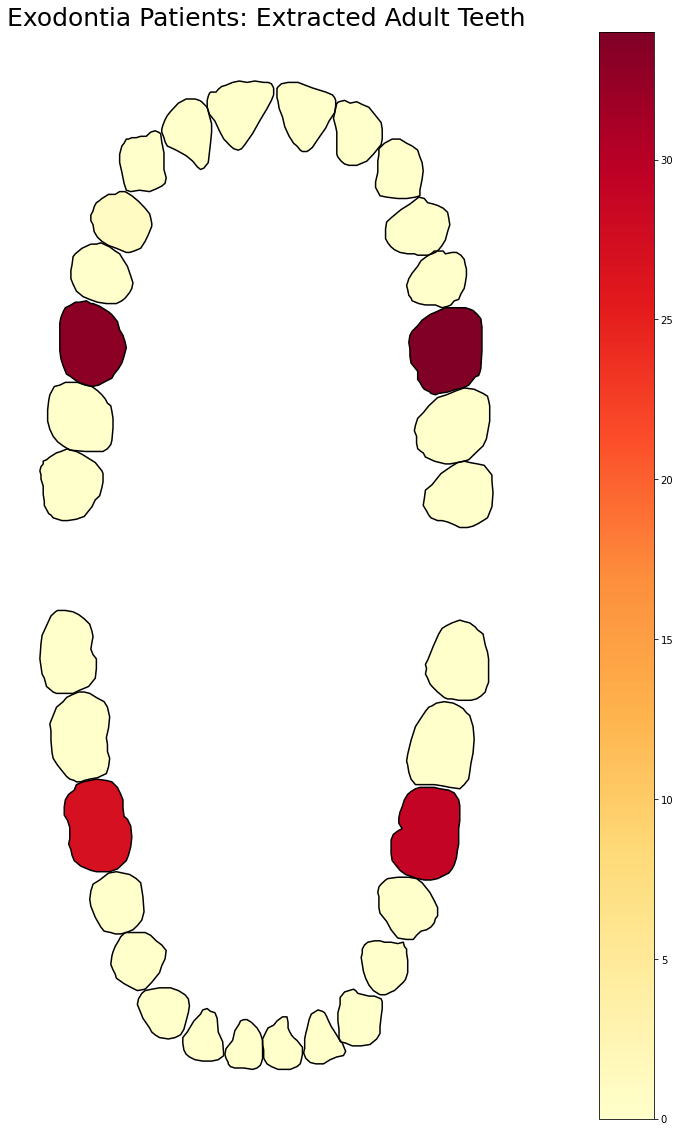

In [6]:
adult = ~exodontia_teeth_data.primary.astype("bool")
ax = exodontia_teeth_data[adult].plot("n_extracted",  
                                      legend=True,  
                                      figsize=(30, 20),  
                                      cmap="YlOrRd")
exodontia_teeth_data[adult].boundary.plot(ax=ax, color="black")
ax.axis("off")
plt.title("Exodontia Patients: Extracted Adult Teeth", fontsize=25);

In [7]:
# build gdf from comp care cases
comp_care_teeth_data = generate_tooth_level_data(ga_data[~extractions_only])
comp_care_teeth_data = (teeth_gdf
                       .merge(comp_care_teeth_data, on="tooth", how="left") 
                       .fillna(0))
comp_care_teeth_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   tooth              52 non-null     object  
 1   primary            52 non-null     int64   
 2   geometry           52 non-null     geometry
 3   n_extracted        52 non-null     float64 
 4   n_filled           52 non-null     float64 
 5   n_sealed           52 non-null     float64 
 6   n_crowned          52 non-null     float64 
 7   n_treated          52 non-null     float64 
 8   n_non_extractions  52 non-null     float64 
dtypes: float64(6), geometry(1), int64(1), object(1)
memory usage: 4.1+ KB


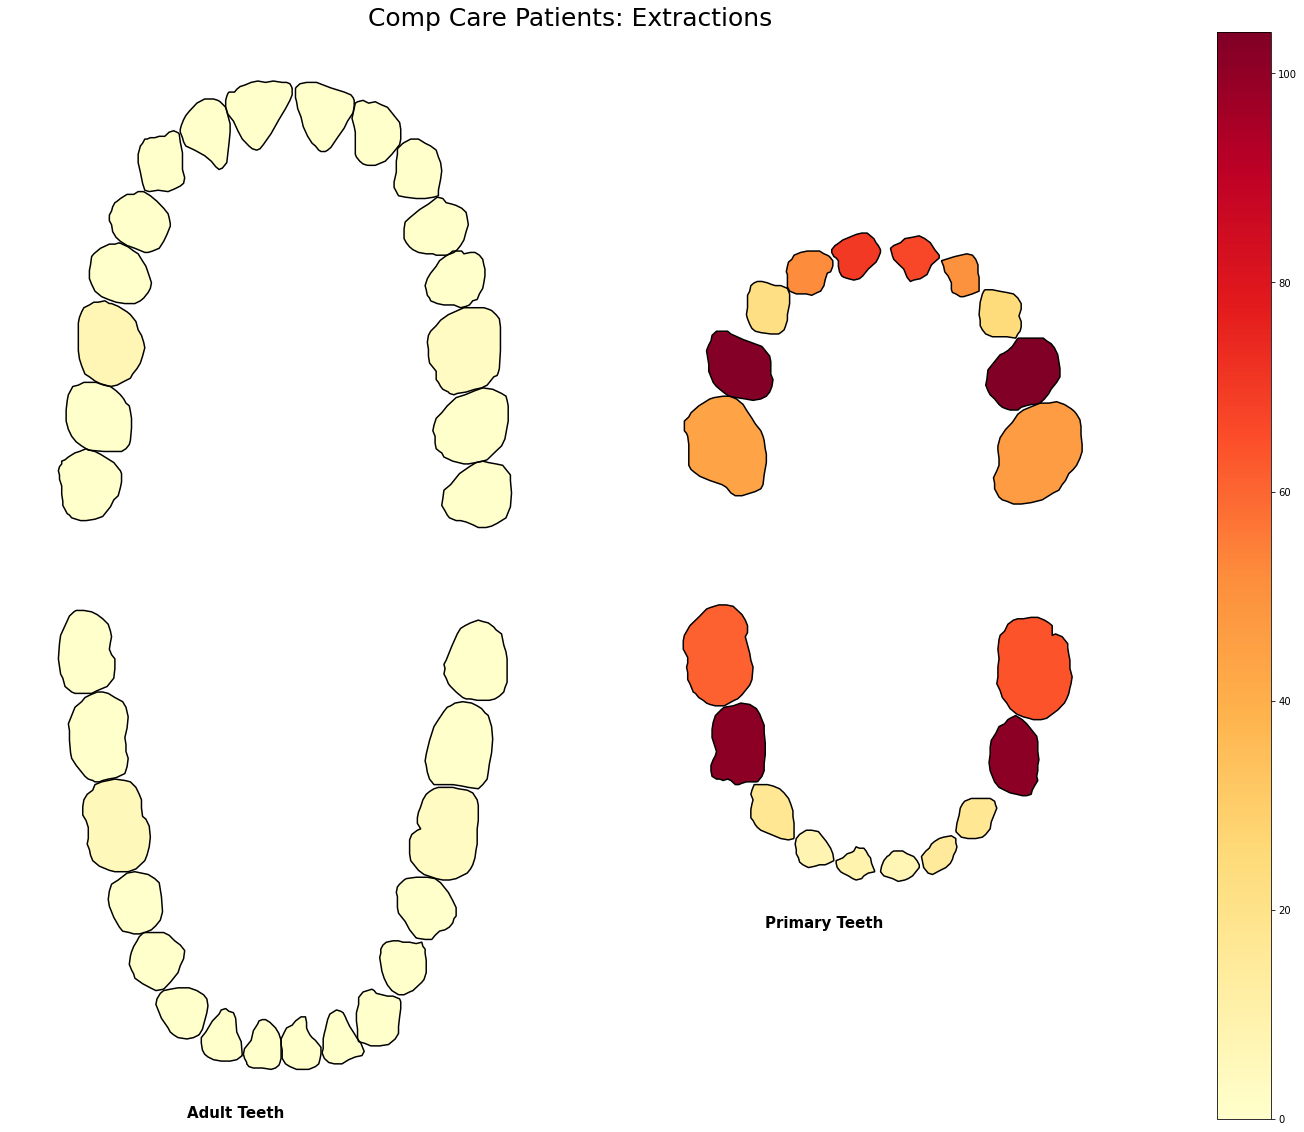

In [11]:
plot_mouth_map(comp_care_teeth_data, 
               "n_extracted",
               cmap="YlOrRd",
               title="Comp Care Patients: Extractions")

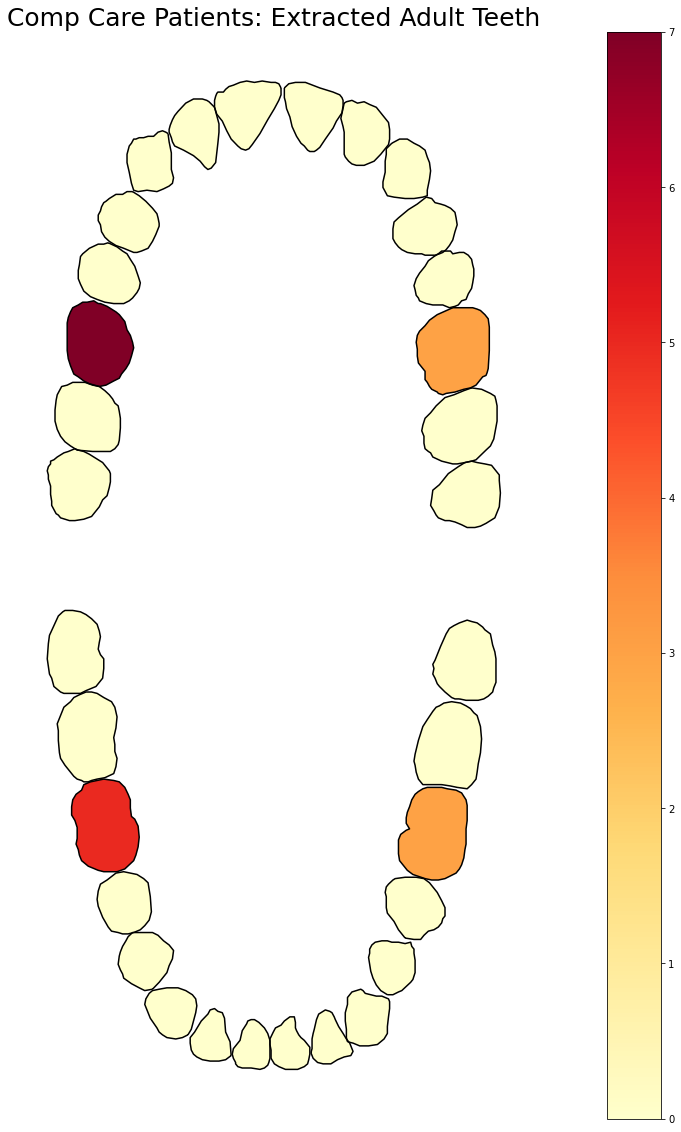

In [12]:
adult = ~comp_care_teeth_data.primary.astype("bool")
ax = comp_care_teeth_data[adult].plot("n_extracted",   
                                      legend=True,   
                                      figsize=(30, 20),   
                                      cmap="YlOrRd")
comp_care_teeth_data[adult].boundary.plot(ax=ax, color="black") 
ax.axis("off")
plt.title("Comp Care Patients: Extracted Adult Teeth", fontsize=25);

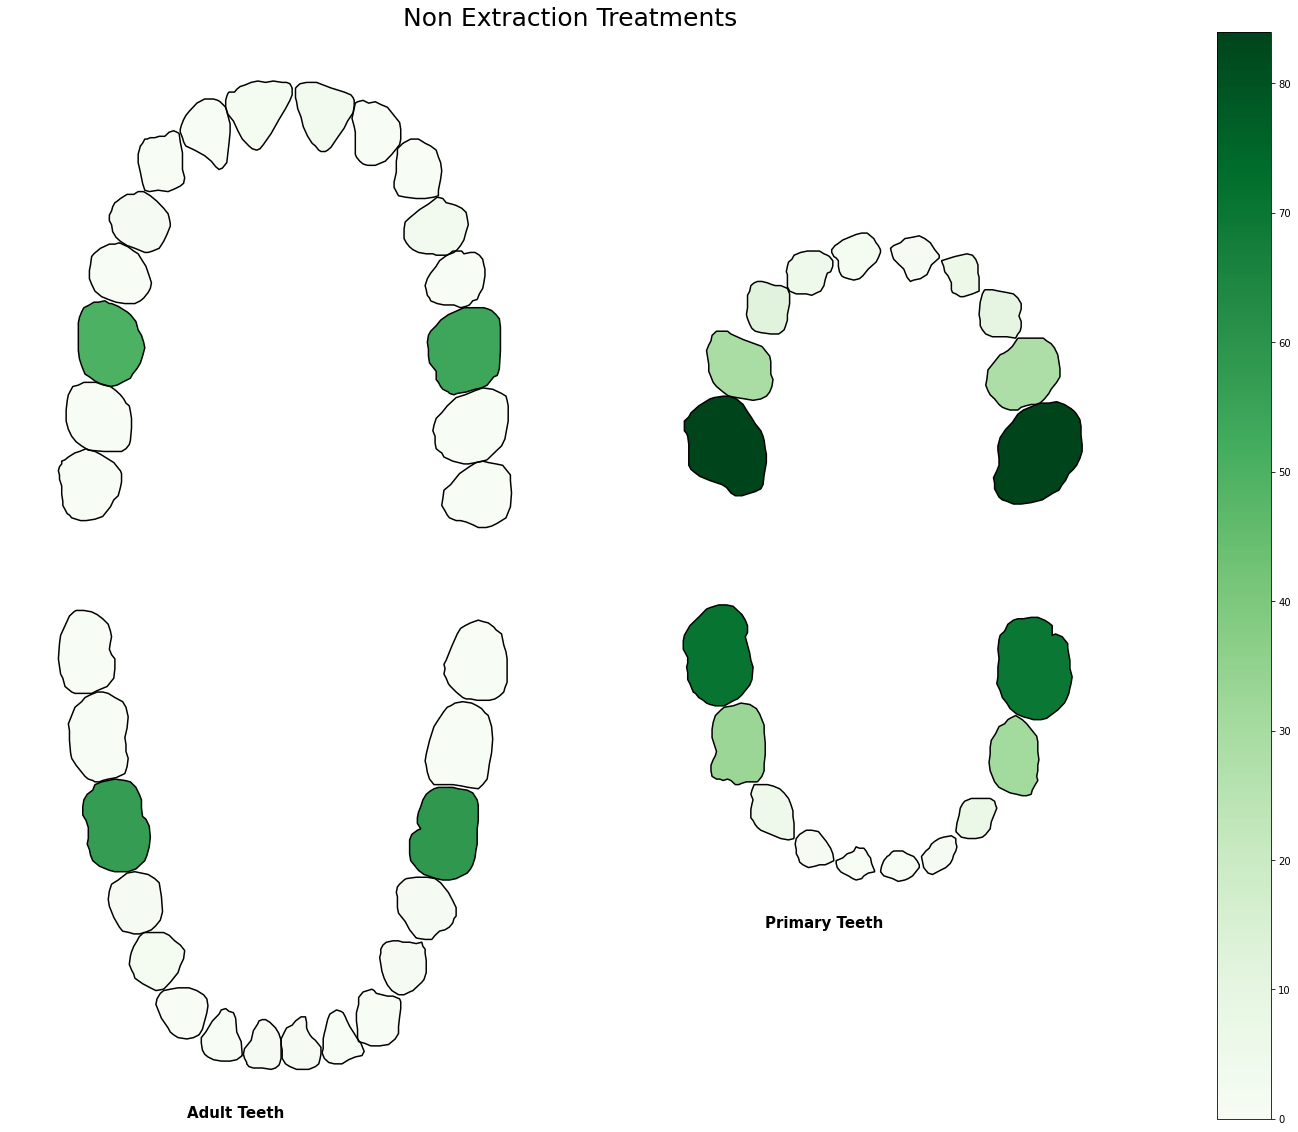

In [13]:
plot_mouth_map(comp_care_teeth_data, 
               "n_non_extractions",
               cmap="Greens",
               title="Non Extraction Treatments")

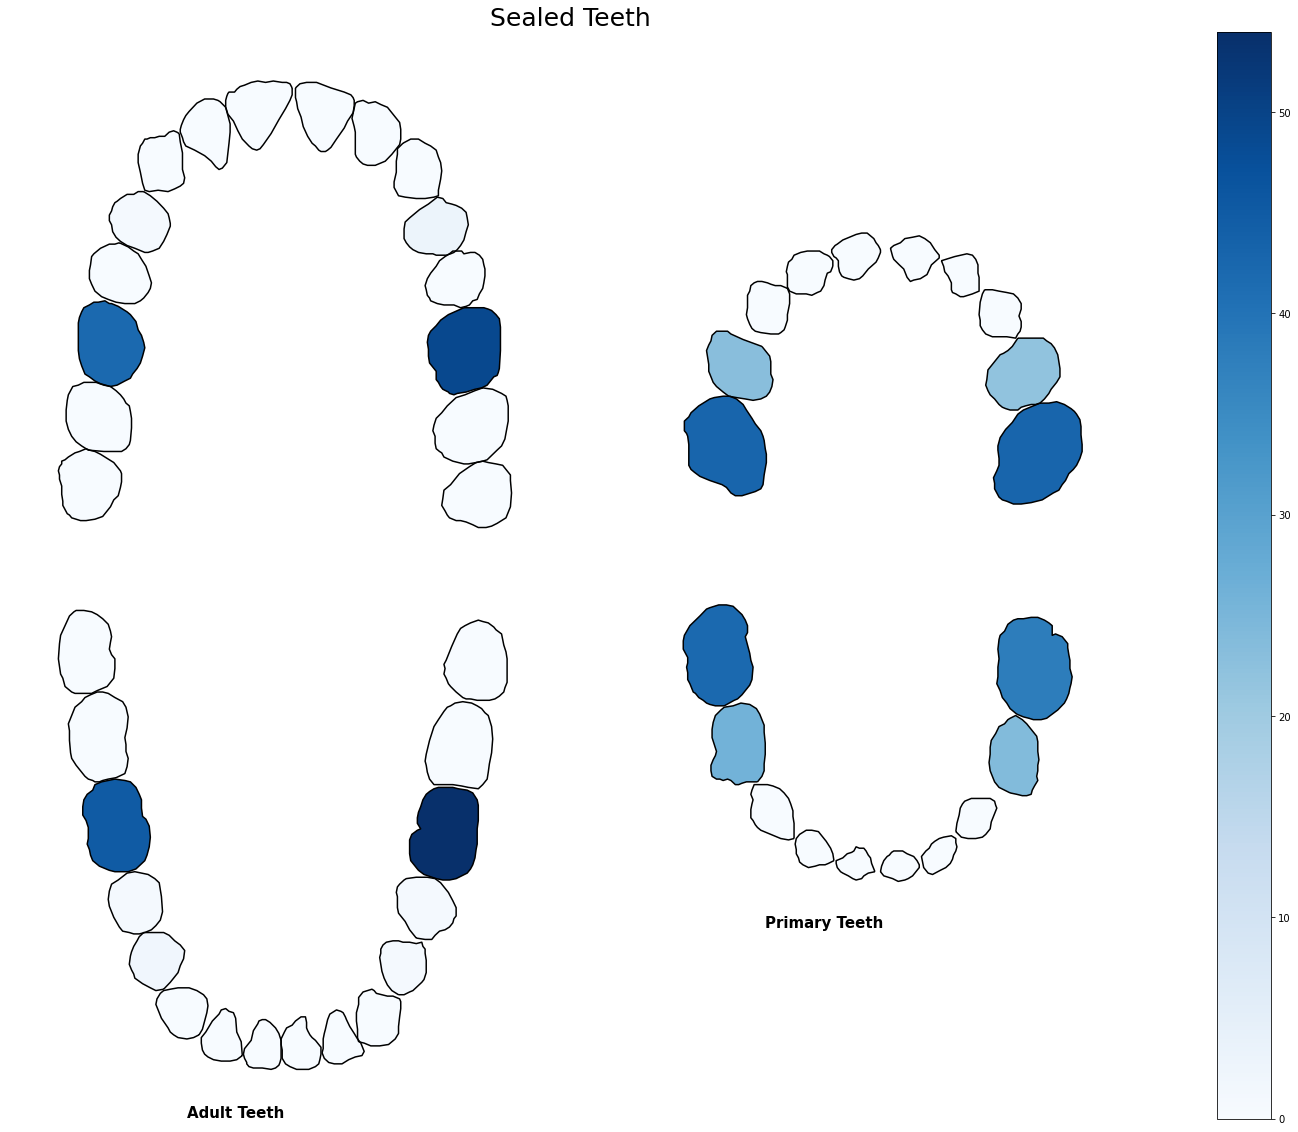

In [15]:
plot_mouth_map(comp_care_teeth_data, 
               "n_sealed",
               cmap="Blues",
               title="Sealed Teeth")

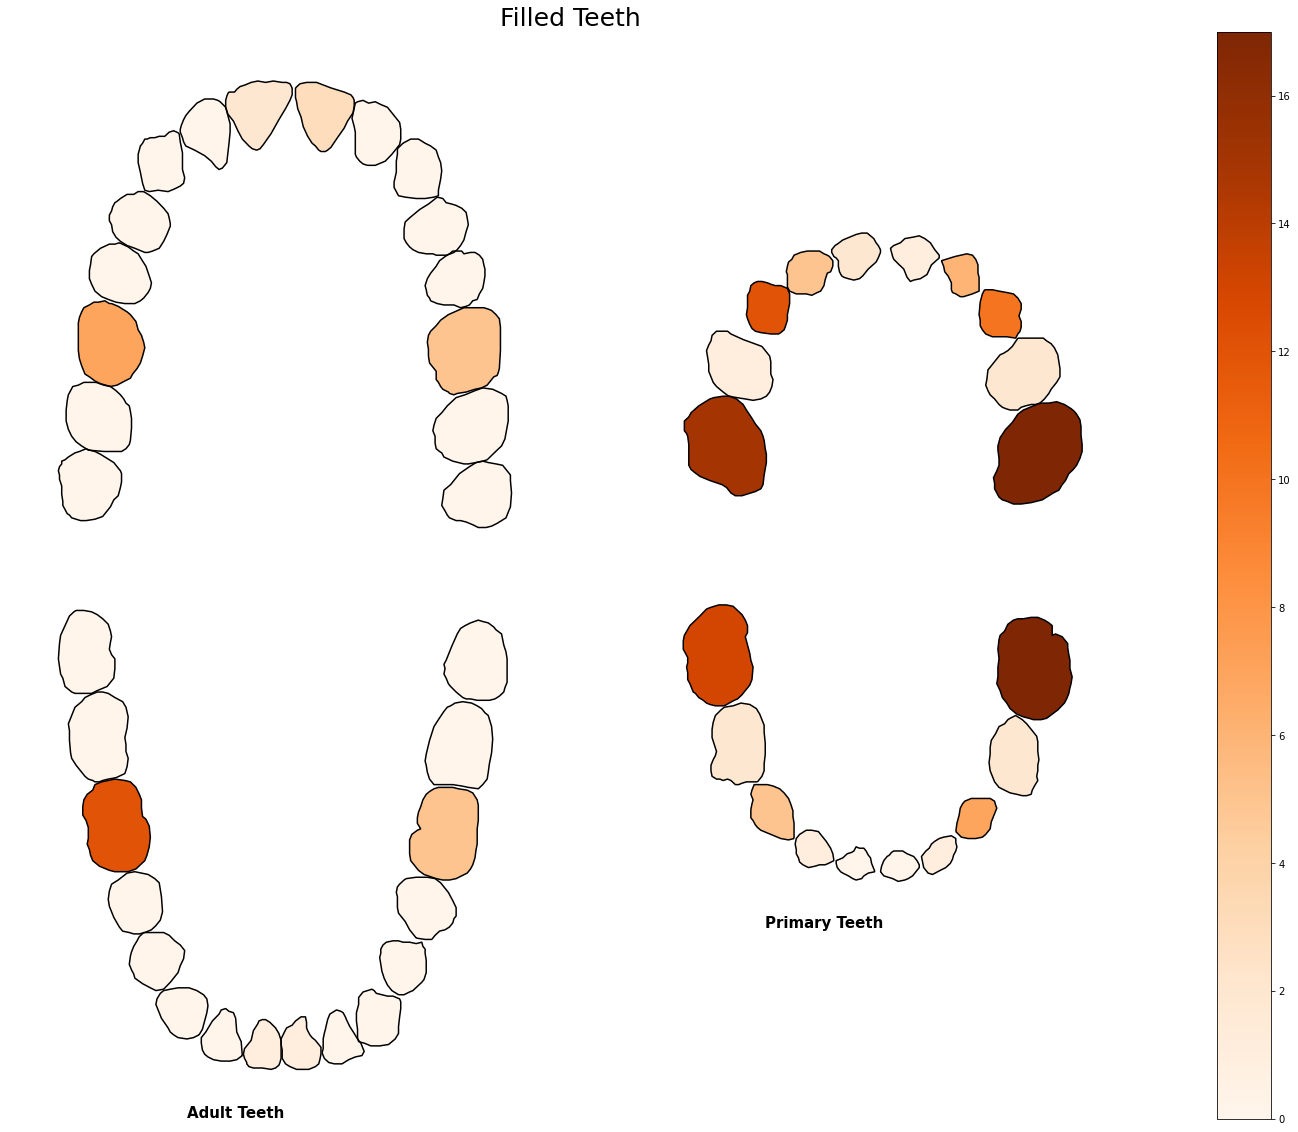

In [18]:
plot_mouth_map(comp_care_teeth_data, 
               "n_filled",
               cmap="Oranges",
               title="Filled Teeth")

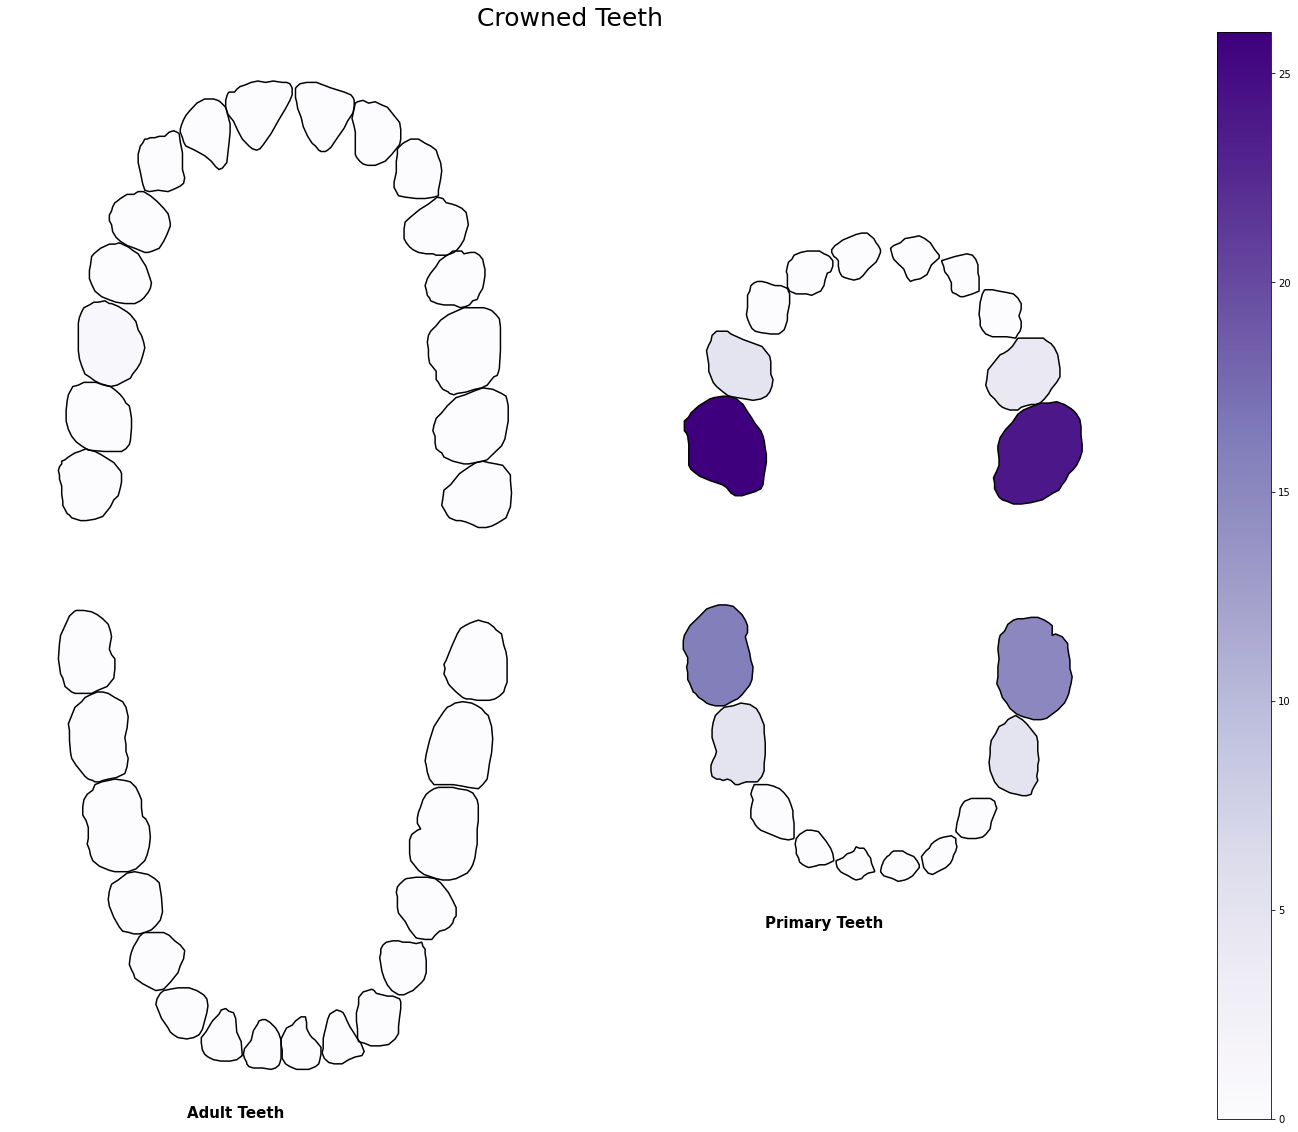

In [17]:
plot_mouth_map(comp_care_teeth_data, 
               "n_crowned",
               cmap="Purples",
               title="Crowned Teeth")
